[link text](https://)**Analyzing U.S. COVID-19 Data**

**Imports:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from plotly.subplots import make_subplots
from sklearn.preprocessing import Normalizer
from google.colab import drive
from oauth2client.client import GoogleCredentials

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from plotly.subplots import make_subplots
from sklearn.preprocessing import Normalizer
from google.colab import drive
from oauth2client.client import GoogleCredentials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the data:**

In [ ]:

data1_path = '/content/drive/Shareddrives/team6/data.csv'

df1 = pd.read_csv(data1_path)


<ipython-input-5-c267239a5a68>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(data1_path)


In [ ]:
df1.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [ ]:
df1.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [ ]:
df1_cleaned = df1.drop_duplicates()


In [ ]:
data2_path = '/content/drive/Shareddrives/team6/pulse_puf_most_recent.csv'
df2 = pd.read_csv(data2_path)

In [ ]:
df2.head()
df2.describe()
print(df2.columns)

In [ ]:
pd.set_option('display.max_columns', None)
print(df2.columns)

Index(['scram', 'week_x', 'est_st', 'est_msa', 'pweight', 'tbirth_year',
       'abirth_year', 'egender', 'agender', 'rhispanic',
       ...
       'eipspnd4', 'eipspnd5', 'eipspnd6', 'eipspnd7', 'eipspnd8', 'eipspnd9',
       'eipspnd10', 'eipspnd11', 'eipspnd12', 'eipspnd13'],
      dtype='object', length=215)


In [ ]:
df2

,scram,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088309,V129950006S12560737500012,12,56,NaN,1845.337833,1999,2,1,2,1,...,-99.0,-99.0,1.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0
1088310,V129950006S31560919300012,12,56,NaN,28.072345,1959,2,2,2,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0
1088311,V129950006S33560787010012,12,56,NaN,63.631564,1958,2,2,2,1,...,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1088312,V129950006S50560436100022,12,56,NaN,68.466260,1966,2,1,2,1,...,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**PART 1: Exploratory Analysis:**

**Use the appropriate statistics and plots to investigate the following:**

. **1. The total number of hospitalizations versus deaths from COVID-19 over the
entire US per month-year timestamp**

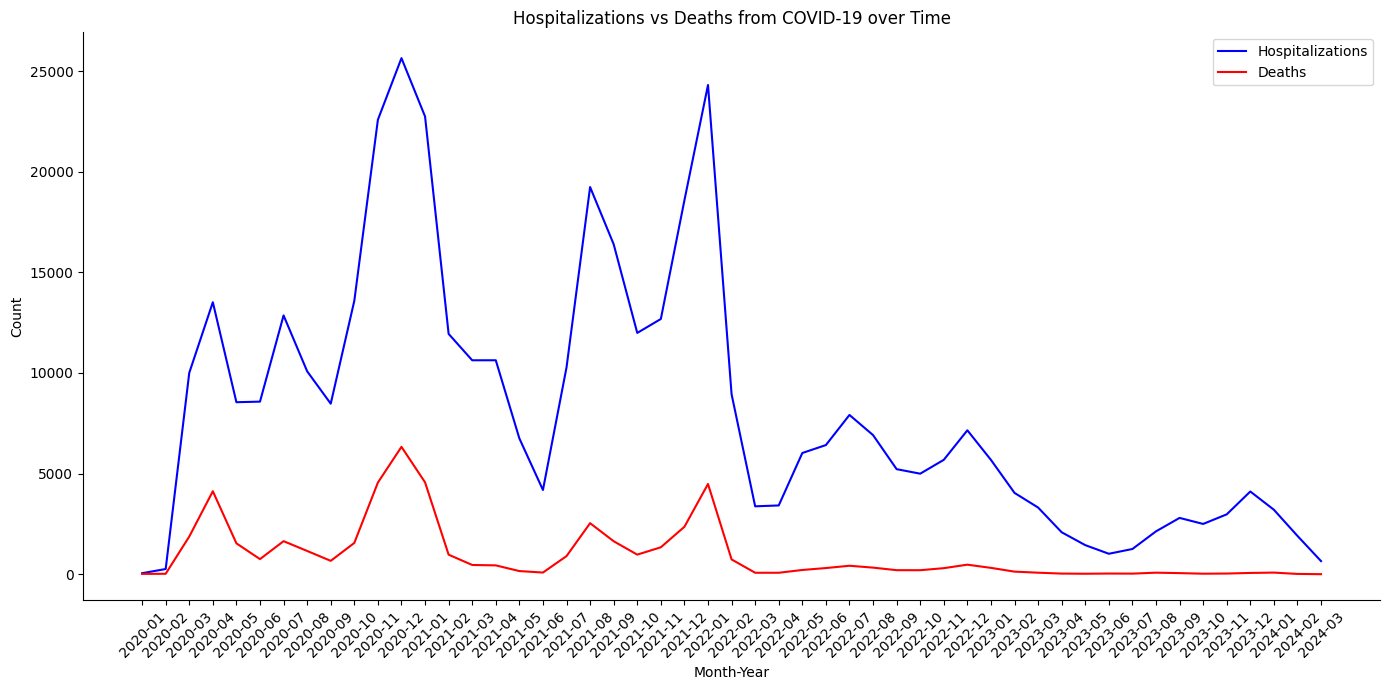

In [ ]:
# Filter rows where 'hosp_yn' is 'Yes' and 'death_yn' is 'Yes'
hospitalizations = df1_cleaned[df1_cleaned['hosp_yn'] == 'Yes']
deaths = df1_cleaned[df1_cleaned['death_yn'] == 'Yes']

# Count hospitalizations and deaths by month
hospitalizations_count = hospitalizations.groupby('case_month').size()
deaths_count = deaths.groupby('case_month').size()

# Combine both series into a DataFrame
summary_df = pd.DataFrame({
    'Hospitalizations': hospitalizations_count,
    'Deaths': deaths_count
}).fillna(0)

# Reset index to get 'case_month' as a column
summary_df = summary_df.reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Create line plots for Hospitalizations and Deaths
plt.plot(summary_df['case_month'], summary_df['Hospitalizations'], linestyle='-', color='b', label='Hospitalizations')
plt.plot(summary_df['case_month'], summary_df['Deaths'], linestyle='-', color='r', label='Deaths')

# Additional customization
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Hospitalizations vs Deaths from COVID-19 over Time')
plt.xticks(rotation=45)
plt.legend()
# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


**2. The average rates of COVID-related deaths relative to patient**


In [ ]:
data = df1_cleaned [df1_cleaned['death_yn'].isin(['Yes', 'No'])]
columns_to_keep = ['death_yn','age_group', 'sex', 'race']

data_demographic = data[columns_to_keep].copy()

data_demographic

,death_yn,age_group,sex,race
0,No,18 to 49 years,Female,Unknown
4,No,65+ years,Female,White
10,No,18 to 49 years,Female,Black
12,No,18 to 49 years,Female,White
13,No,50 to 64 years,Female,White
...,...,...,...,...
19020868,No,65+ years,Female,White
19020903,No,18 to 49 years,Female,White
19020907,No,50 to 64 years,Male,White
19020912,No,18 to 49 years,Male,White


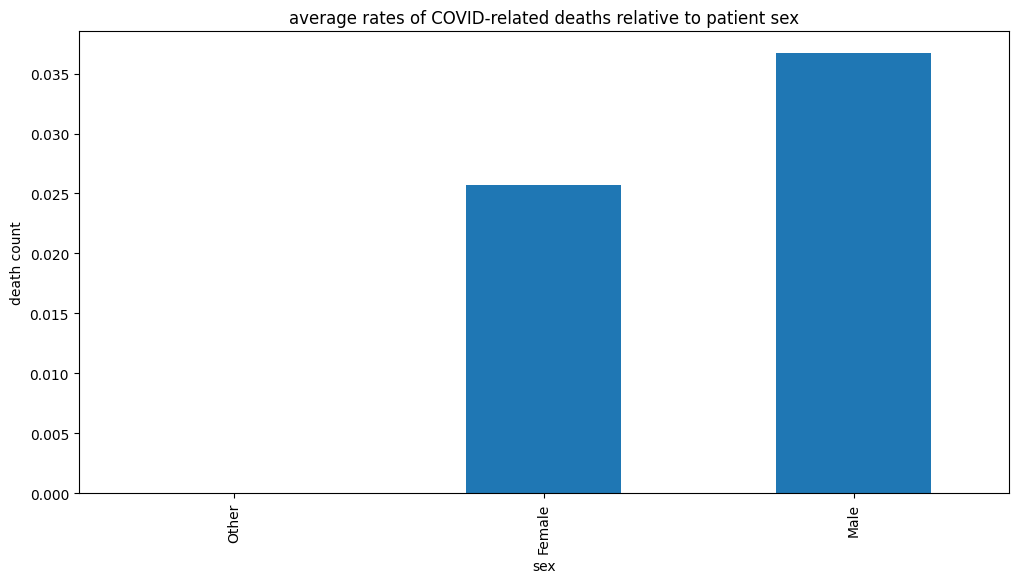

In [ ]:
data_demographic_sex =data_demographic.groupby('sex')['death_yn'].value_counts(normalize=True).unstack().fillna(0)

data_demographic_sex_plot = data_demographic_sex['Yes']
plt.figure(figsize=(12, 6))
data_demographic_sex_plot.sort_values().plot(kind='bar')
plt.ylabel('death count')
plt.title('average rates of COVID-related deaths relative to patient sex')
plt.xlabel('sex')

plt.grid(False)  # Remove grid borders
plt.show()

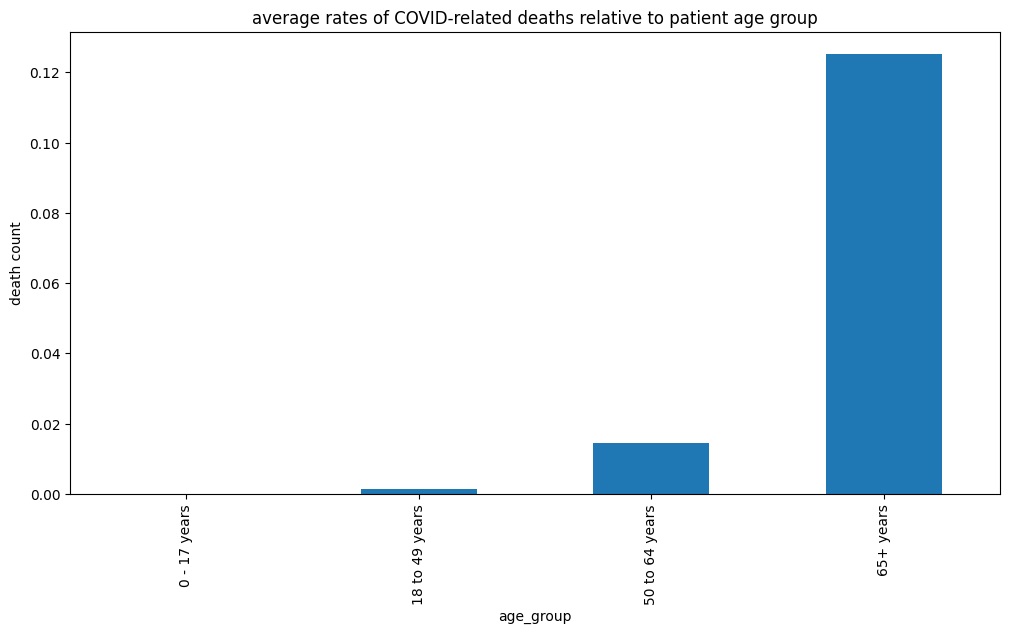

In [ ]:
data_demographic_age_group =data_demographic.groupby('age_group')['death_yn'].value_counts(normalize=True).unstack().fillna(0)

data_demographic_age_group_plot = data_demographic_age_group['Yes']
plt.figure(figsize=(12, 6))
data_demographic_age_group_plot.sort_values().plot(kind='bar')
plt.ylabel('death count')
plt.title('average rates of COVID-related deaths relative to patient age group')

plt.xlabel('age_group')

plt.grid(False)  # Remove grid borders
plt.show()

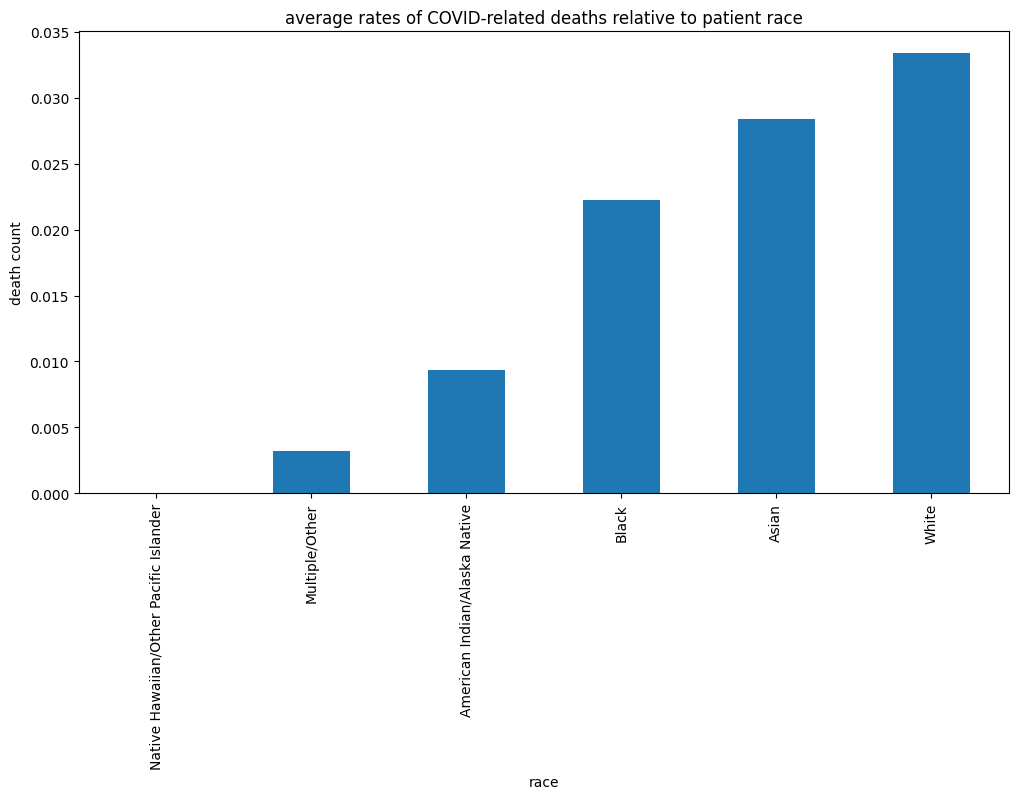

In [ ]:
data_demographic_race =data_demographic.groupby('race')['death_yn'].value_counts(normalize=True).unstack().fillna(0)

data_demographic_race_plot = data_demographic_race['Yes']
plt.figure(figsize=(12, 6))
data_demographic_race_plot.sort_values().plot(kind='bar')
plt.ylabel('death count')
plt.title('average rates of COVID-related deaths relative to patient race')

plt.xlabel('race')

plt.grid(False)  # Remove grid borders
plt.show()

In [ ]:
data_demographic_sex

death_yn,No,Yes
sex,,
Female,0.978469,0.021531
Male,0.969457,0.030543
Missing,0.986246,0.013754
Other,1.000000,0.000000
Unknown,0.999099,0.000901


In [ ]:
data_demographic_sex_plot

sex
Female     0.021531
Male       0.030543
Missing    0.013754
Other      0.000000
Unknown    0.000901
Name: Yes, dtype: float64

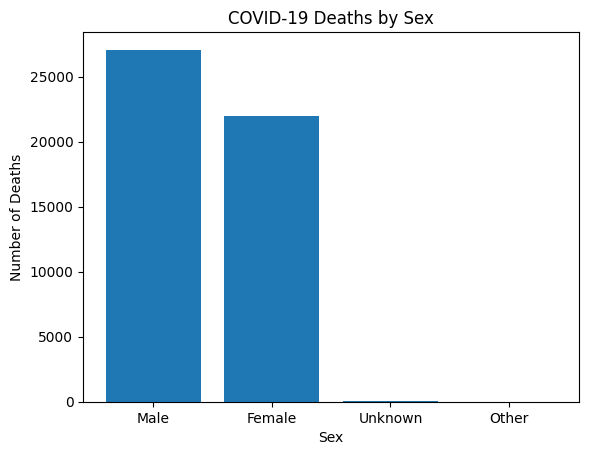

In [ ]:

# Load the dataset

# Filter out rows where 'death_yn' is not 'Yes' or 'No'
data = df1_cleaned [df1_cleaned['death_yn'].isin(['Yes', 'No'])]

death_counts = data[data['death_yn'] == 'Yes']['sex'].value_counts()

# Define the order of categories for the x-axis
sex_labels = ['Male', 'Female', 'Unknown','Other']

# Create bar chart
plt.bar(sex_labels, death_counts)
plt.xlabel('Sex')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths by Sex')
plt.show()


In [ ]:
death_counts = data[data['death_yn'] == 'Yes']['sex'].value_counts()
death_counts

# **3. The rates of COVID-related hospitalization and death with age (across age
groups).**

In [ ]:
columns_to_keep = ['death_yn','hosp_yn','age_group']
# Filter rows where 'death_yn' and 'hosp_yn' are either 'Yes' or 'No'
filtered_data = df1_cleaned[df1_cleaned['death_yn'].isin(['Yes', 'No']) & df1_cleaned['hosp_yn'].isin(['Yes', 'No'])]

# Keep only the specified columns
data = filtered_data[columns_to_keep]

# Display the resulting DataFrame
data

,death_yn,hosp_yn,age_group
4,No,No,65+ years
10,No,No,18 to 49 years
12,No,No,18 to 49 years
13,No,No,50 to 64 years
16,No,No,0 - 17 years
...,...,...,...
19020868,No,No,65+ years
19020903,No,No,18 to 49 years
19020907,No,No,50 to 64 years
19020912,No,No,18 to 49 years


In [ ]:


# Step 1: Data Filtering
filtered_data = df1_cleaned[df1_cleaned['death_yn'].isin(['Yes', 'No']) & df1_cleaned['hosp_yn'].isin(['Yes', 'No'])]

# Step 2: Data Selection (Drop 'missing' values from 'age_group')
columns_to_keep = ['death_yn', 'hosp_yn', 'age_group']
data = filtered_data[filtered_data['age_group'] != 'Missing'][columns_to_keep]

# Step 3: Grouping and Aggregation
grouped_data = data.groupby('age_group').agg({
    'death_yn': lambda x: (x == 'Yes').mean(),
    'hosp_yn': lambda x: (x == 'Yes').mean()
}).reset_index()

# Step 4: Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='age_group', y='death_yn', marker='o', label='Death Rate')
sns.lineplot(data=grouped_data, x='age_group', y='hosp_yn', marker='o', label='Hospitalization Rate')
plt.xlabel('Age Group')
plt.ylabel('Rate')
plt.title('COVID-19 Hospitalization and Death Rates Across Age Groups')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df1_cleaned' is not defined

In [ ]:
import pandas as pd

# Assuming df1_cleaned is your DataFrame containing the data

# Count the unique values of 'res_state'
unique_res_states = df1_cleaned['res_state'].unique()

# Print the unique values
print("Unique values of res_state:")
for state in unique_res_states:
    print(state)

# Print the total number of unique values
print("Total number of unique res_states:", len(unique_res_states))


# **4. Average rate of COVID-related hospitalization and death per state over the
entire study period.**

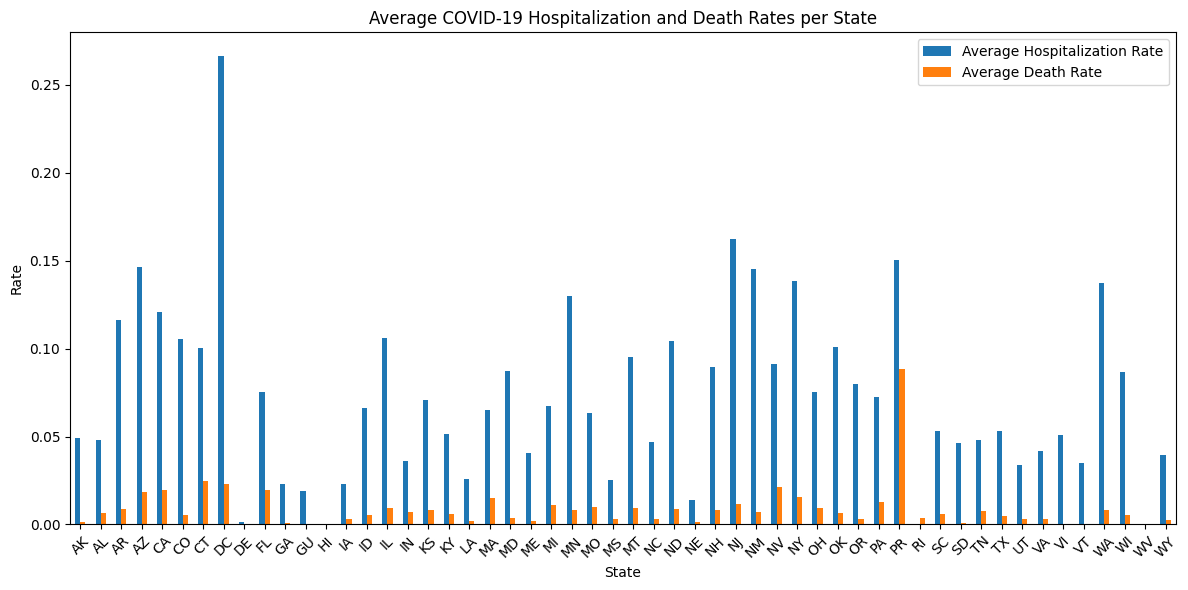

In [ ]:
# Group the data by state
grouped_data = df1_cleaned.groupby('res_state')

# Calculate the total number of hospitalizations and deaths per state
hospitalizations_per_state = grouped_data['hosp_yn'].apply(lambda x: (x == 'Yes').sum())
deaths_per_state = grouped_data['death_yn'].apply(lambda x: (x == 'Yes').sum())

# Calculate the total number of cases per state
total_cases_per_state = grouped_data.size()

# Calculate the average hospitalization and death rates per state
average_hospitalization_rate = hospitalizations_per_state / total_cases_per_state
average_death_rate = deaths_per_state / total_cases_per_state

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Average Hospitalization Rate': average_hospitalization_rate,
    'Average Death Rate': average_death_rate
})

# Print the DataFrame
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Average COVID-19 Hospitalization and Death Rates per State')
plt.xlabel('State')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

 **5. The relationship between age, pre-existing medical conditions and/or risk
behaviors, and rate of admittance to the ICU.**

In [ ]:
df = df1_cleaned[['age_group', 'underlying_conditions_yn', 'icu_yn']].copy()
df = df[~df['age_group'].isin(['Missing', 'Unknown'])]
df = df[~df['underlying_conditions_yn'].isin(['Missing', 'Unknown'])]
df = df[~df['icu_yn'].isin(['Missing', 'Unknown'])]
df.dropna(inplace=True)
df['newcol'] = df[['age_group', 'underlying_conditions_yn']].astype(str).agg('_'.join, axis=1)
df

<ipython-input-10-9570bce3d297>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,age_group,underlying_conditions_yn,icu_yn,newcol
282,50 to 64 years,Yes,No,50 to 64 years_Yes
284,50 to 64 years,Yes,No,50 to 64 years_Yes
297,50 to 64 years,Yes,No,50 to 64 years_Yes
312,50 to 64 years,Yes,No,50 to 64 years_Yes
383,18 to 49 years,Yes,No,18 to 49 years_Yes
...,...,...,...,...
19019803,50 to 64 years,Yes,No,50 to 64 years_Yes
19020187,50 to 64 years,Yes,No,50 to 64 years_Yes
19020294,50 to 64 years,Yes,No,50 to 64 years_Yes
19020446,50 to 64 years,No,No,50 to 64 years_No


In [ ]:
from scipy.stats import chi2_contingency

columns_to_keep = ['icu_yn', 'newcol']
df_copy = df[columns_to_keep].copy()
contingency_table = pd.crosstab(df_copy['newcol'], df_copy['icu_yn'])

# # Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 4426.64222277476
p-value: 0.0


the p value less than 0.05  so we can reject the null and say their a relation

In [ ]:
df_copy

,icu_yn,newcol
282,No,50 to 64 years_Yes
284,No,50 to 64 years_Yes
297,No,50 to 64 years_Yes
312,No,50 to 64 years_Yes
383,No,18 to 49 years_Yes
...,...,...
19019803,No,50 to 64 years_Yes
19020187,No,50 to 64 years_Yes
19020294,No,50 to 64 years_Yes
19020446,No,50 to 64 years_No


In [ ]:
columns_to_keep = ['icu_yn', 'age_group', 'underlying_conditions_yn']

# Keep only the specified columns
data = df1_cleaned[columns_to_keep]

# Display the resulting DataFrame
data.head()
df_icu_combined = data.groupby(['age_group', 'underlying_conditions_yn']).agg(icu_rate=pd.NamedAgg(column='icu_yn', aggfunc=lambda x: (x == 'Yes').mean() * 100)
).reset_index()
df_icu_combined

,age_group,underlying_conditions_yn,icu_rate
0,0 - 17 years,No,0.109409
1,0 - 17 years,Yes,0.596421
2,18 to 49 years,No,0.303275
3,18 to 49 years,Yes,1.213844
4,50 to 64 years,No,1.163503
5,50 to 64 years,Yes,3.493752
6,65+ years,No,2.590674
7,65+ years,Yes,5.577168
8,Missing,No,0.000000
9,Missing,Yes,0.000000


<ipython-input-96-33218d44a6bc>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


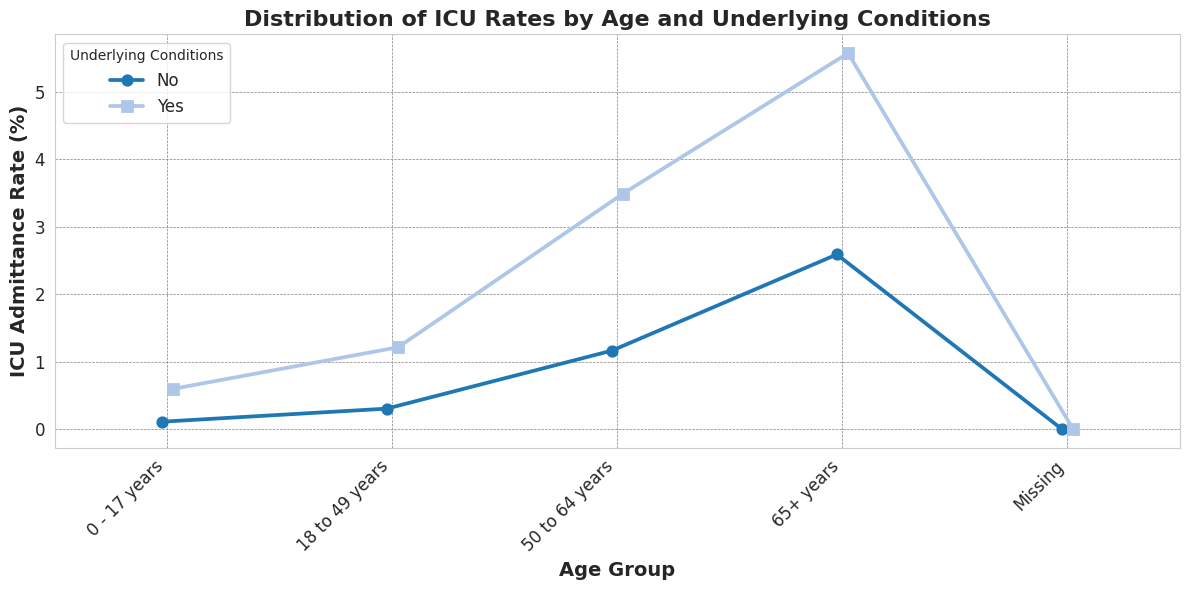

In [ ]:

# Create the point plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.pointplot(
    data=df_icu_combined,
    x="age_group",
    y="icu_rate",
    hue="underlying_conditions_yn",
    palette="tab20",  # Use a more informative color palette
    dodge=True,
    markers=["o", "s"],
    capsize=0.2,  # Slightly larger error bar caps
    errwidth=1,  # Thinner error bars
)

# Customize labels and title
plt.xlabel("Age Group", fontsize=14, fontweight="bold")
plt.ylabel("ICU Admittance Rate (%)", fontsize=14, fontweight="bold")
plt.title("Distribution of ICU Rates by Age and Underlying Conditions", fontsize=16, fontweight="bold")

# Adjust axis ticks and legend
plt.xticks(rotation=45, ha="right", fontsize=12)  # Horizontal alignment for better readability
plt.yticks(fontsize=12)
plt.legend(title="Underlying Conditions", loc="upper left", fontsize=12)  # Adjust legend position

# Add annotations (optional)
# You can add annotations to highlight specific data points or trends

# Display the plot
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")  # Adjust grid style
plt.tight_layout()
plt.show()

In [ ]:
df_icu_combined

,age_group,underlying_conditions_yn,icu_rate
0,0 - 17 years,No,0.109409
1,0 - 17 years,Yes,0.596421
2,18 to 49 years,No,0.303275
3,18 to 49 years,Yes,1.213844
4,50 to 64 years,No,1.163503
5,50 to 64 years,Yes,3.493752
6,65+ years,No,2.590674
7,65+ years,Yes,5.577168
8,Missing,No,0.000000
9,Missing,Yes,0.000000


 **6. The rate of expected employment loss due to COVID-19 and sector of
employment.**

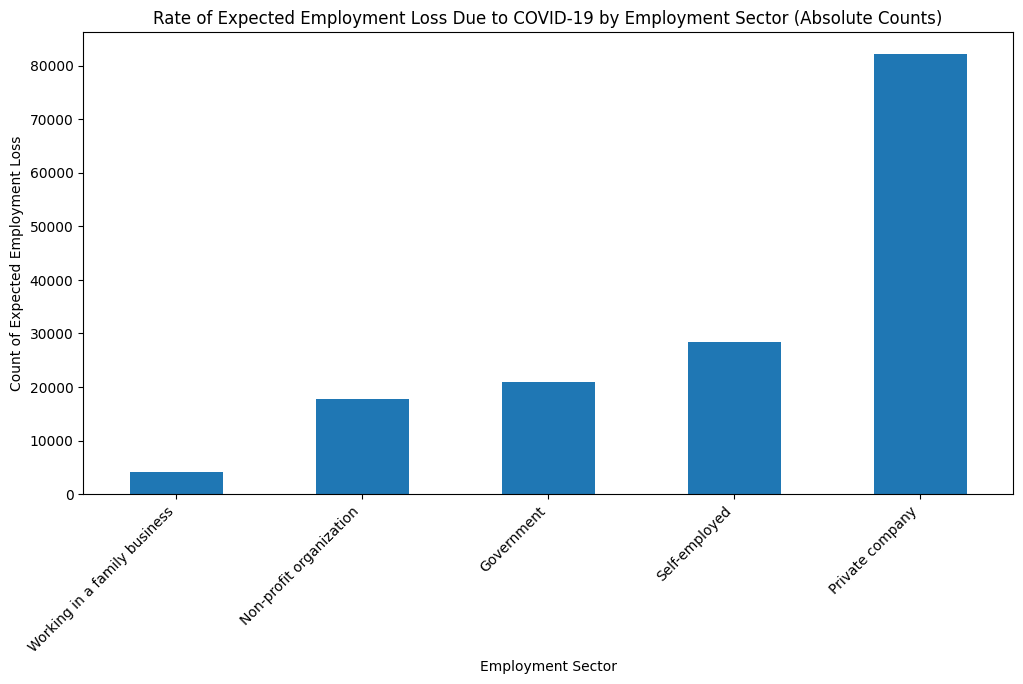

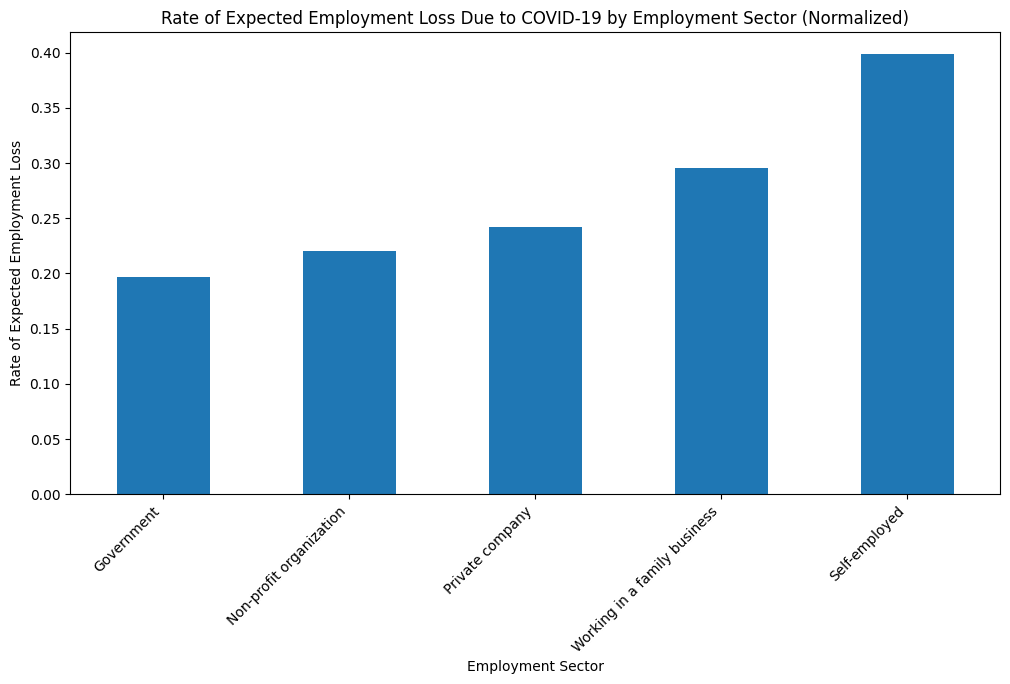

In [ ]:
columns_to_keep = ['kindwork', 'expctloss']
pulse_survey_data_subset_Q6 = df2[columns_to_keep].copy()

# Define mappings
kindwork_mapping = {
    1: 'Government',
    2: 'Private company',
    3: 'Non-profit organization',
    4: 'Self-employed',
    5: 'Working in a family business',
    -99: 'Question seen but category not selected',
    -88: 'Missing / Did not report'
}
expctloss_mapping = {
    1: 'Yes',
    2: 'No'
}

# Apply mappings
pulse_survey_data_subset_Q6['kindwork'] = pulse_survey_data_subset_Q6['kindwork'].replace(kindwork_mapping)
pulse_survey_data_subset_Q6['expctloss'] = pulse_survey_data_subset_Q6['expctloss'].replace(expctloss_mapping)

# Filter out unnecessary rows
pulse_survey_data_filtered_Q6 = pulse_survey_data_subset_Q6[~pulse_survey_data_subset_Q6['kindwork'].isin(['Missing / Did not report', 'Question seen but category not selected'])]

# Function to plot the data
def plot_employment_loss_rates(normalize):
    employment_loss_rates = pulse_survey_data_filtered_Q6.groupby('kindwork')['expctloss'].value_counts(normalize=normalize).unstack().fillna(0)
    employment_loss_rates_yes = employment_loss_rates['Yes']

    # Plot the data
    plt.figure(figsize=(12, 6))
    employment_loss_rates_yes.sort_values().plot(kind='bar')
    plt.xlabel('Employment Sector')
    plt.ylabel('Rate of Expected Employment Loss' if normalize else 'Count of Expected Employment Loss')
    plt.title(f'Rate of Expected Employment Loss Due to COVID-19 by Employment Sector ({"Normalized" if normalize else "Absolute Counts"})')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)  # Remove grid borders
    plt.show()

# Plot without normalization
plot_employment_loss_rates(normalize=False)

# Plot with normalization
plot_employment_loss_rates(normalize=True)


 **7. The rate of expected employment loss due to COVID-19 relative to
responders demographics.**

<ipython-input-41-ccc6d36c9821>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulse_survey_data_subset[column] = pulse_survey_data_subset[column].replace(mapping)


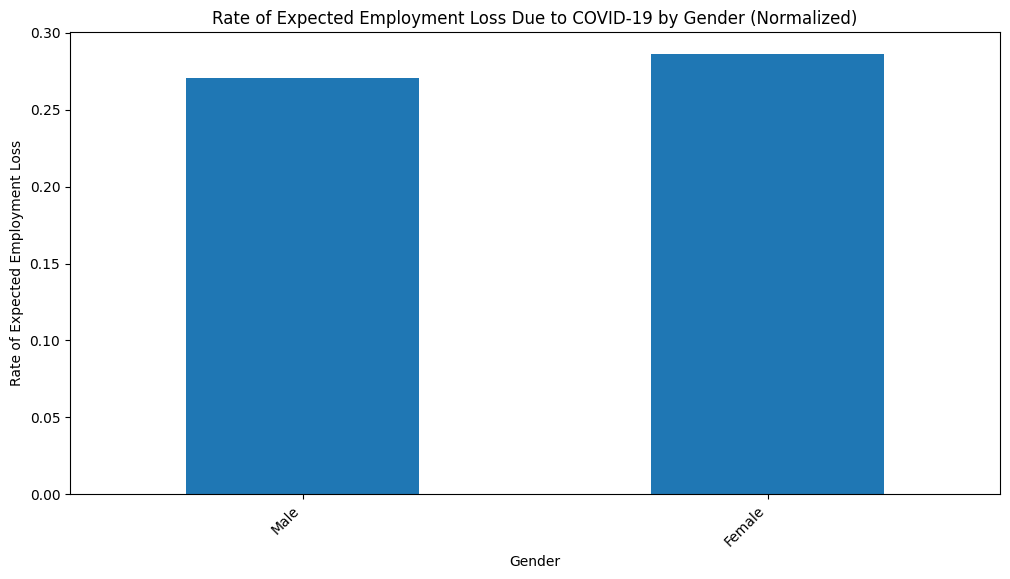

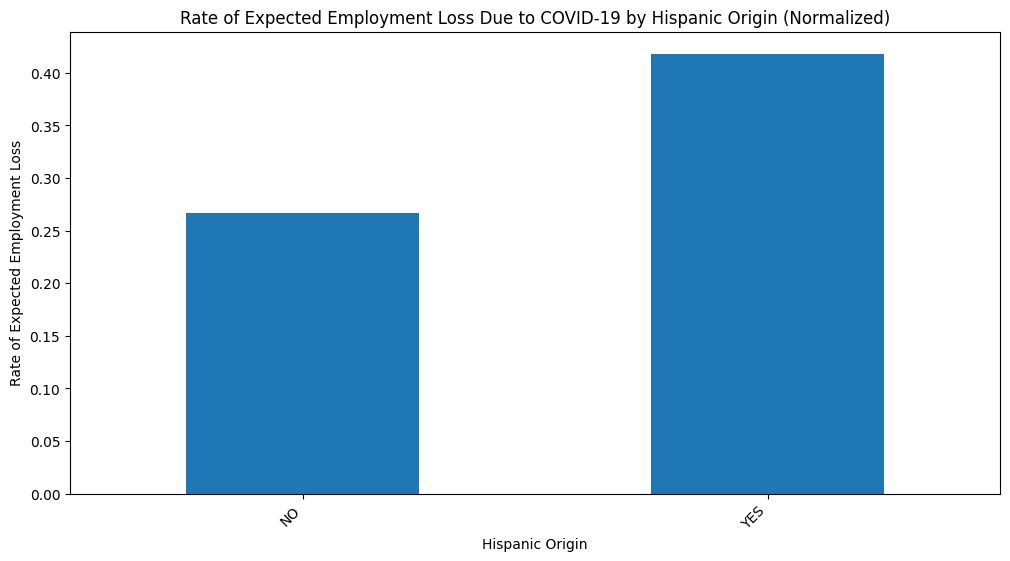

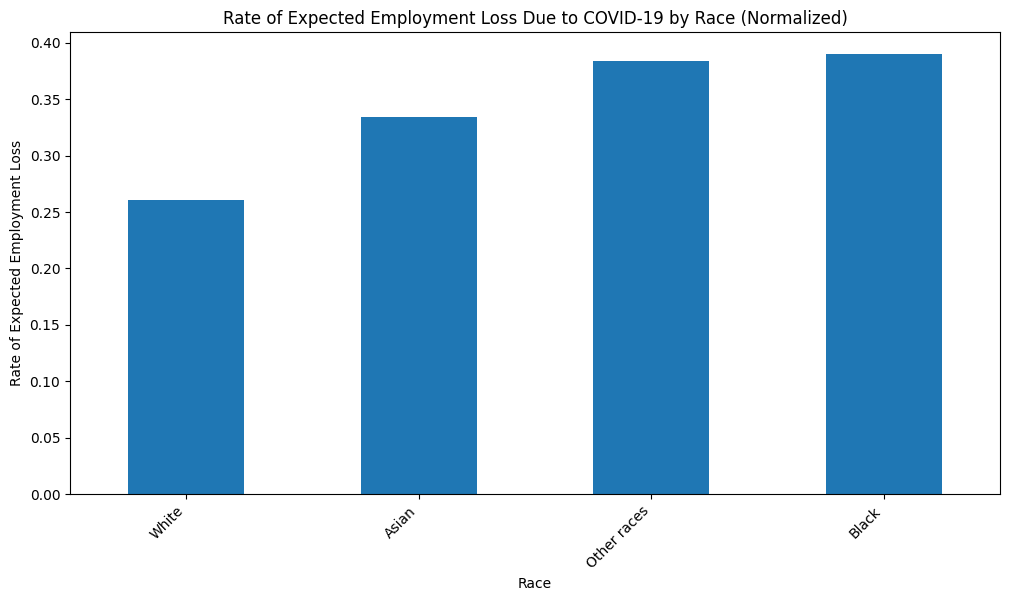

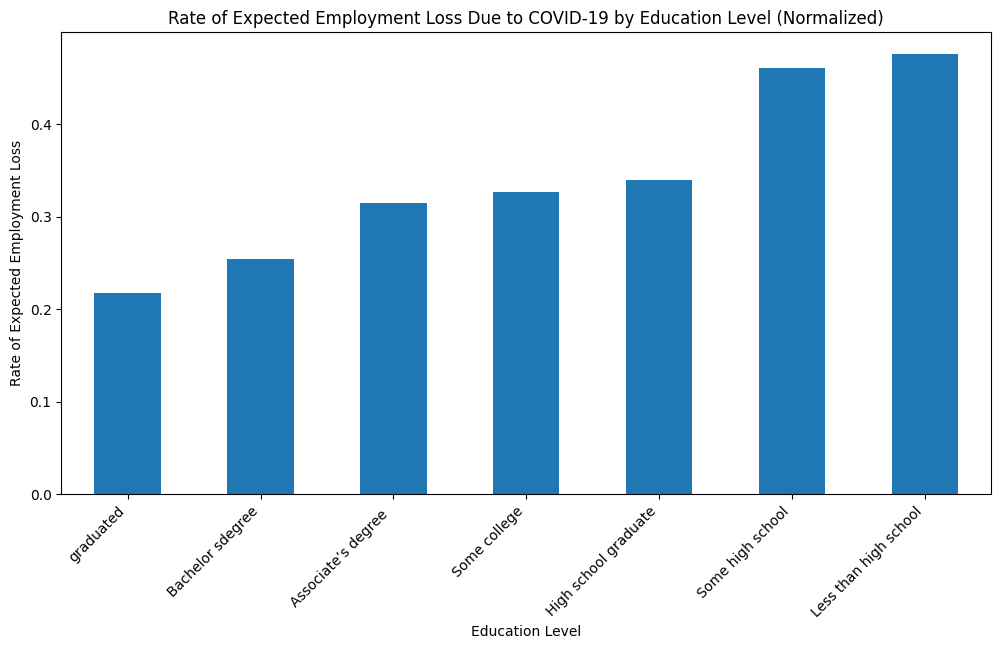

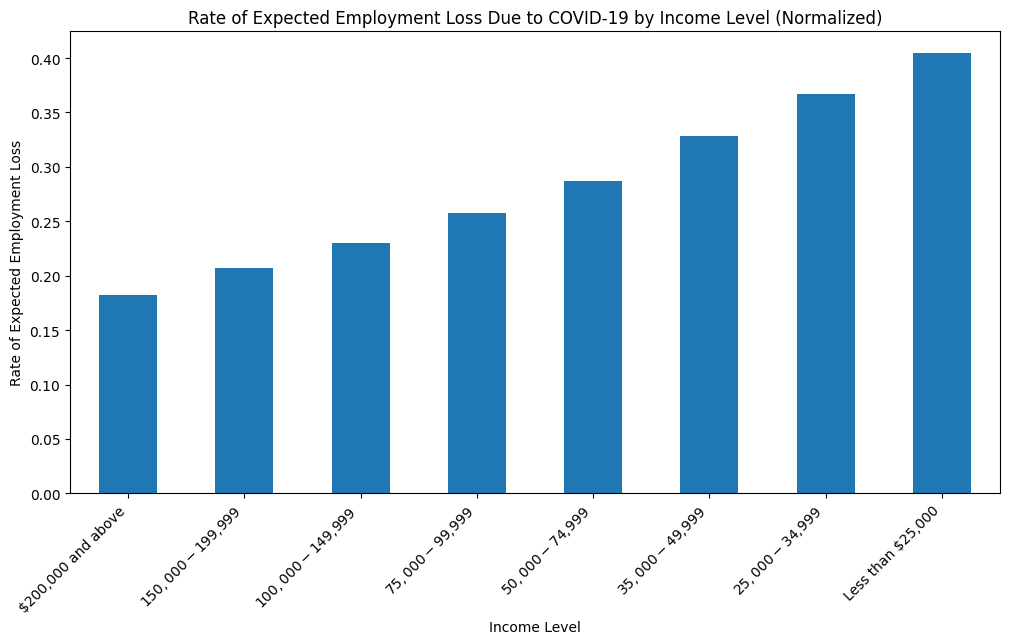

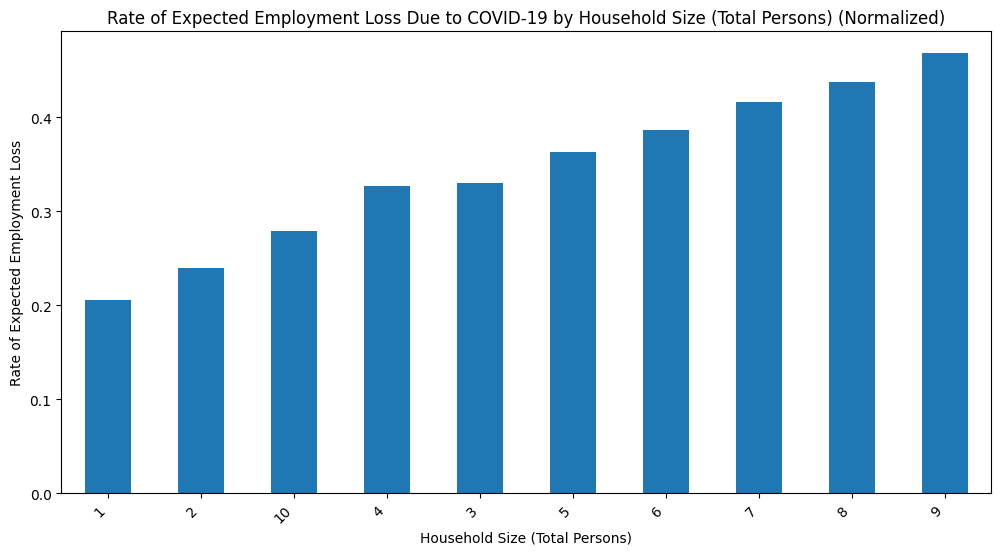

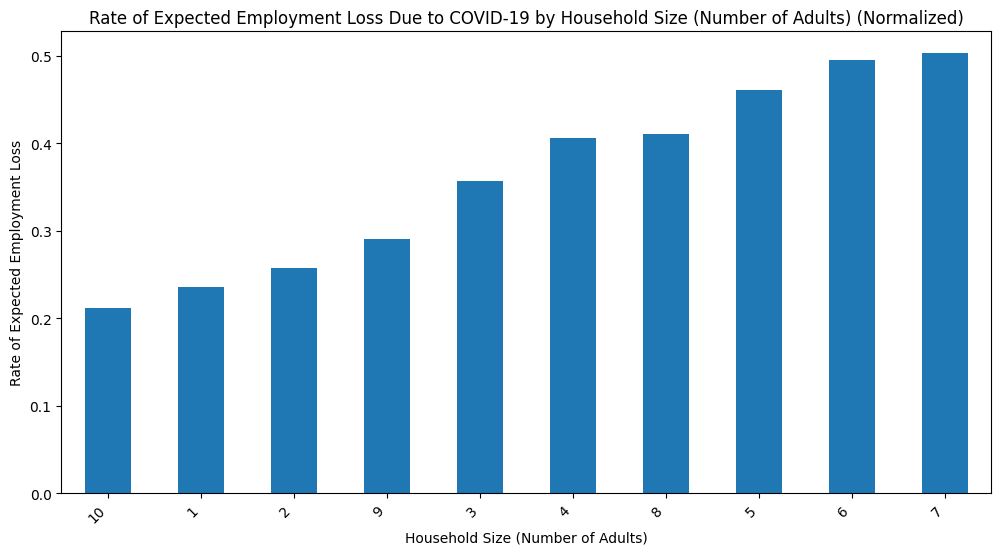

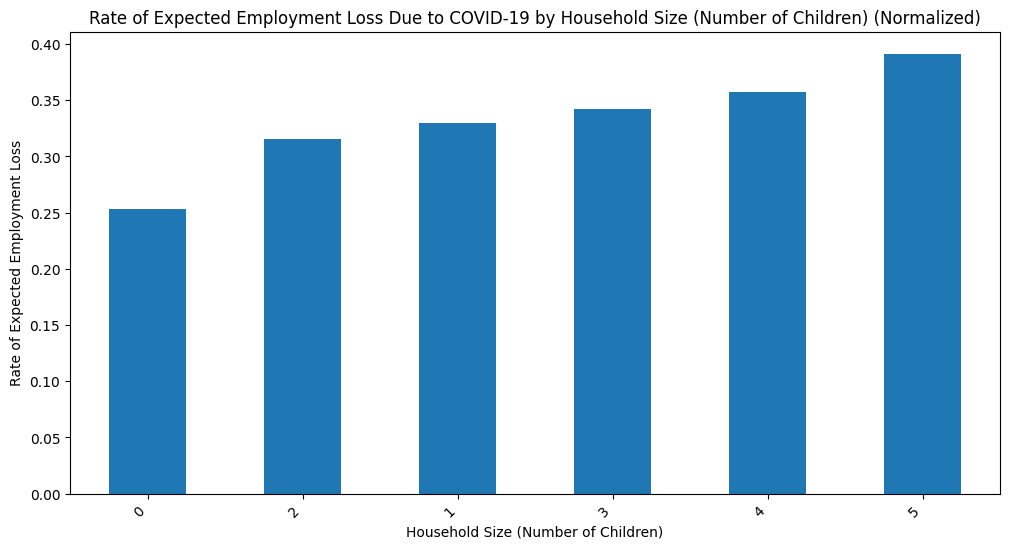

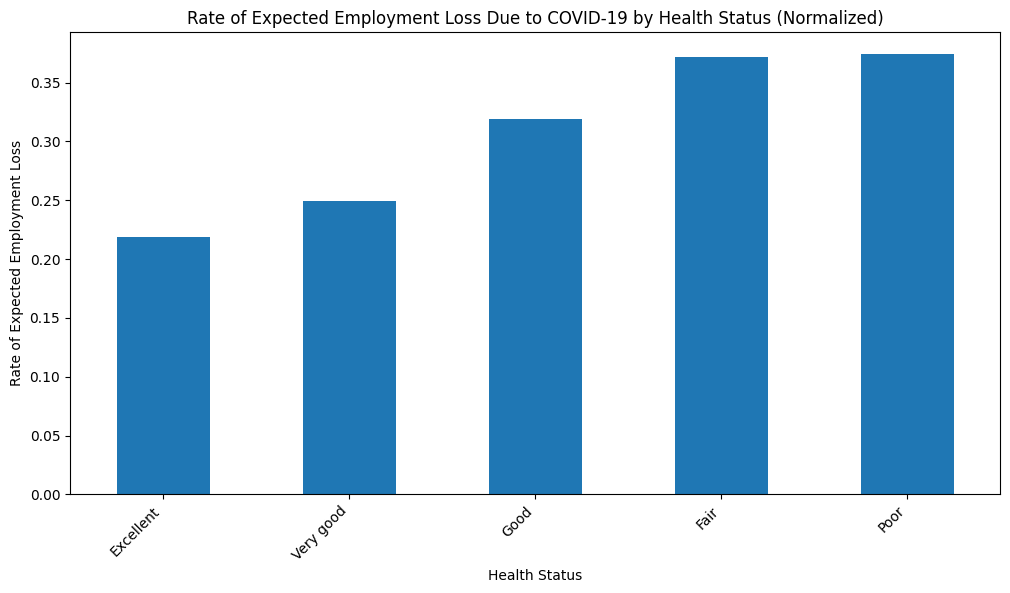

In [ ]:

# Columns to keep with readable names
columns_to_keep = {
    'egender': 'Gender',
    'rhispanic': 'Hispanic Origin',
    'rrace': 'Race',
    'eeduc': 'Education Level',
    'income': 'Income Level',
    'thhld_numper': 'Household Size (Total Persons)',
    'thhld_numadlt': 'Household Size (Number of Adults)',
    'thhld_numkid': 'Household Size (Number of Children)',
    'hlthstatus': 'Health Status',
    'expctloss': 'Expected Employment Loss'
}

# Select the necessary columns
pulse_survey_data_subset = df2[list(columns_to_keep.keys())].copy()

# Rename the columns to their readable meanings
pulse_survey_data_subset.rename(columns=columns_to_keep, inplace=True)

# Define value mappings
value_mappings = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Hispanic Origin': {1: 'NO', 2: 'YES'},
    'Race': {1: 'White', 2: 'Black', 3: 'Asian', 4: 'Other races'},
    'Education Level': {1: 'Less than high school', 2: 'Some high school', 3: 'High school graduate', 4: 'Some college', 5: 'Associate’s degree ', 6: ' Bachelor sdegree', 7 :'graduated'},
    'Income Level': {1: 'Less than $25,000', 2: '$25,000 - $34,999', 3: '$35,000 - $49,999', 4: '$50,000 - $74,999', 5: '$75,000 - $99,999', 6: '$100,000 - $149,999 ' , 7:'$150,000 - $199,999',8:'$200,000 and above'},
    'Health Status': {1: 'Excellent', 2: 'Very good', 3: 'Good', 4: 'Fair', 5: 'Poor'},
    'Expected Employment Loss': {1: 'Yes', 2: 'No'}
}

# Apply value mappings and filter out unknown values
for column, mapping in value_mappings.items():
    pulse_survey_data_subset[column] = pulse_survey_data_subset[column].replace(mapping)
    # Remove rows where values are not in the mapping (i.e., unknown values)
    pulse_survey_data_subset = pulse_survey_data_subset[pulse_survey_data_subset[column].isin(mapping.values())]

# Filter out rows with missing data
pulse_survey_data_filtered = pulse_survey_data_subset.dropna()

# Function to calculate and plot employment loss rates for a given demographic variable
def plot_employment_loss_by_demographic(demographic_column, normalize):
    employment_loss_rates = pulse_survey_data_filtered.groupby(demographic_column)['Expected Employment Loss'].value_counts(normalize=normalize).unstack().fillna(0)
    employment_loss_rates_yes = employment_loss_rates['Yes']

    # Plot the data
    plt.figure(figsize=(12, 6))
    employment_loss_rates_yes.sort_values().plot(kind='bar')
    plt.xlabel(demographic_column)
    plt.ylabel('Rate of Expected Employment Loss' if normalize else 'Count of Expected Employment Loss')
    plt.title(f'Rate of Expected Employment Loss Due to COVID-19 by {demographic_column} ({"Normalized" if normalize else "Absolute Counts"})')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)  # Remove grid borders
    plt.show()

# Plot for each demographic variable with and without normalization
demographic_columns = list(columns_to_keep.values())
demographic_columns.remove('Expected Employment Loss')
for col in demographic_columns:
   # plot_employment_loss_by_demographic(col, normalize=False)
    plot_employment_loss_by_demographic(col, normalize=True)




 **8. The rate of expected employment loss due to COVID-19 for the top 10 states
with the highest rate of COVID hospitalization.**

In [ ]:
dataframe1_subset = df1_cleaned[['res_state', 'hosp_yn']].copy()

dataframe1_subset = dataframe1_subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
dataframe1_subset = dataframe1_subset.dropna()
dataframe1_subset =dataframe1_subset.groupby('res_state').value_counts(normalize=True).unstack().fillna(0)
dataframe1_subset = dataframe1_subset[1].sort_values(ascending=False).head(10)
print(dataframe1_subset)

res_state
ND    0.993760
AR    0.982808
MO    0.965999
MN    0.699889
PR    0.491738
SD    0.490305
DC    0.489031
NY    0.423126
GA    0.396030
CT    0.351072
Name: 1.0, dtype: float64


In [ ]:
dataframe1_subset = dataframe1_subset.replace({'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
                      'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia',
                      'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
                      'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
                      'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
                      'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
                      'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
                      'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
                      'WI': 'Wisconsin', 'WY': 'Wyoming', 'VI': 'Virgin Islands', 'PR': 'Puerto Rico', 'GU': 'Guam'})
print(dataframe1_subset)

res_state
ND    0.993760
AR    0.982808
MO    0.965999
MN    0.699889
PR    0.491738
SD    0.490305
DC    0.489031
NY    0.423126
GA    0.396030
CT    0.351072
Name: 1.0, dtype: float64


In [ ]:
dataframe2_subset = df2[['est_st', 'expctloss']].copy()

dataframe2_subset['expctloss'] = dataframe2_subset['expctloss'].replace({1: 'Yes', 2: 'No', -88: None, -99: None})
dataframe2_subset = dataframe2_subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
dataframe2_subset = dataframe2_subset.dropna()
print(dataframe2_subset)

         est_st  expctloss
0            47        0.0
1             1        0.0
2            26        0.0
3             1        1.0
4             1        0.0
...         ...        ...
1088309      56        0.0
1088310      56        0.0
1088311      56        0.0
1088312      56        1.0
1088313      56        1.0

[1081146 rows x 2 columns]


In [ ]:
dataframe2_subset['est_st'] = dataframe2_subset['est_st'].replace({1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
                                                          9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
                                                          15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
                                                          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
                                                          26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
                                                          31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
                                                          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
                                                          41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
                                                          47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
                                                          54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'})

print(dataframe2_subset)

            est_st  expctloss
0        Tennessee        0.0
1          Alabama        0.0
2         Michigan        0.0
3          Alabama        1.0
4          Alabama        0.0
...            ...        ...
1088309    Wyoming        0.0
1088310    Wyoming        0.0
1088311    Wyoming        0.0
1088312    Wyoming        1.0
1088313    Wyoming        1.0

[1081146 rows x 2 columns]


In [ ]:
part1_8 = pd.merge(dataframe1_subset[['res_state', 'hosp_yn']], dataframe2_subset[['est_st', 'expctloss']], left_on='res_state', right_on='est_st' )


In [ ]:
grouped_expctloss_8 = part1_8.groupby(['res_state'])['expctloss'].value_counts(normalize=True).unstack().fillna(0)

grouped_expctloss_8 = grouped_expctloss_8.sort_values(by=grouped_expctloss_8.columns[0], ascending=False)
print(grouped_expctloss_8)

expctloss          0.0       1.0
res_state                       
Ohio          0.749333  0.250667
Minnesota     0.732950  0.267050
Arizona       0.732224  0.267776
Pennsylvania  0.718173  0.281827
Illinois      0.717597  0.282403
Texas         0.685976  0.314024
New York      0.677400  0.322600
Florida       0.674202  0.325798
New Jersey    0.673049  0.326951
California    0.658813  0.341187


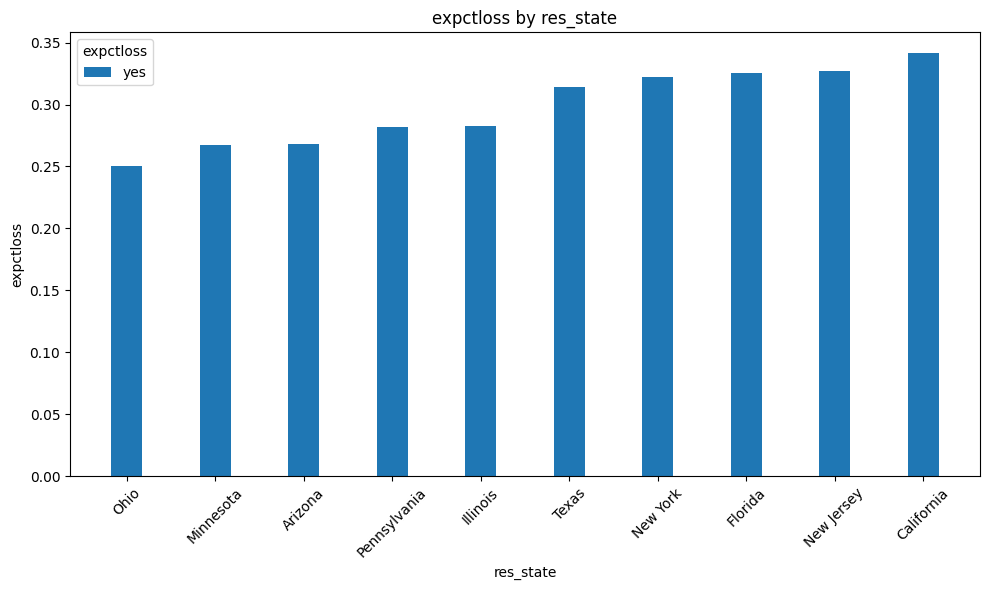

In [ ]:
import matplotlib.pyplot as plt

# Set the x-axis positions for the bars
x = np.arange(len(grouped_expctloss_8))

# Set the width of each bar
bar_width = 0.35

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, grouped_expctloss_8[1], bar_width, label='yes')
#ax.bar(x + bar_width, grouped_expctloss_8[0], bar_width, label='2')

# Set the x-axis labels to be the kindwork categories
#ax.set_xticks(x + bar_width/2)
ax.set_xticks(x)

# Change the row names
#grouped_expctloss_8.index = ['Female', 'Male']
ax.set_xticklabels(grouped_expctloss_8.index, rotation=45)

ax.set_xlabel('res_state')
ax.set_ylabel('expctloss')
ax.set_title('expctloss by res_state')
ax.legend(title='expctloss')

plt.tight_layout()
plt.show()

---------------------------------------------------------------------


 **9. The relationship between household income and the rate of delayed/ OR
unobtained medical treatment (Due to COVID or otherwise).**

Chi-Square Test for Delayed Medical Treatment:
Chi2 Statistic: 341.2118051314387, p-value: 9.366557120581557e-70
Chi-Square Test for Not Obtained Medical Treatment:
Chi2 Statistic: 4749.0295028299515, p-value: 0.0


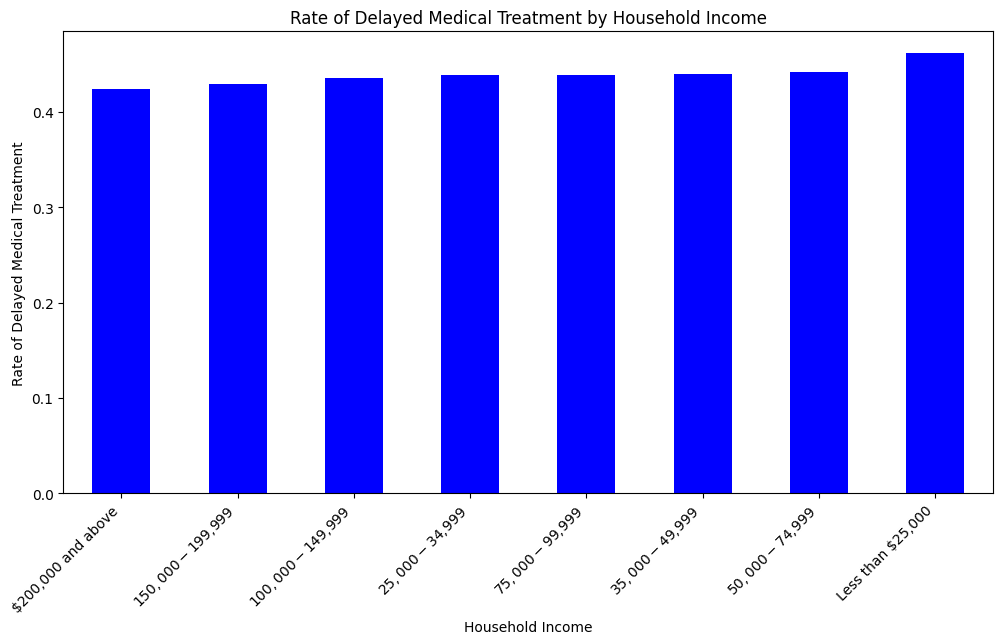

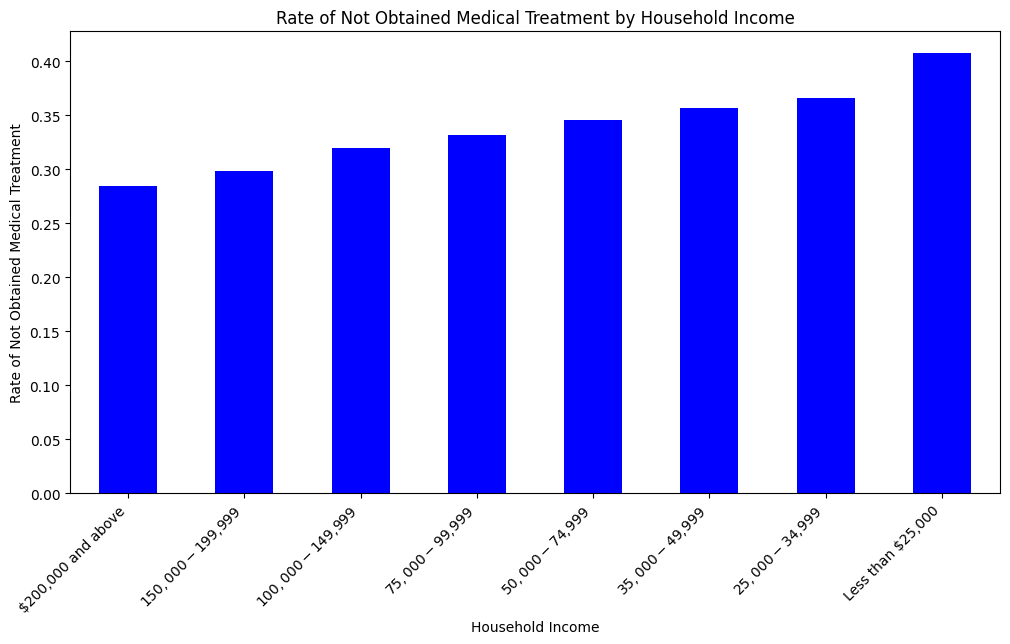

In [ ]:
from scipy.stats import chi2_contingency
# Columns to keep
columns_to_keep = ['income', 'delay', 'notget']

# Subset the data
pulse_data_subset = df2[columns_to_keep].copy()


income_mapping = {
    1: 'Less than $25,000',
    2: '$25,000 - $34,999',
    3: '$35,000 - $49,999',
    4: '$50,000 - $74,999',
    5: '$75,000 - $99,999',
    6: '$100,000 - $149,999',
    7: '$150,000 - $199,999',
    8: '$200,000 and above'
}
treatment_mapping = {
    1: 'Yes',
    2: 'No'
}

# Apply value mappings and filter out unknown values
pulse_data_subset['income'] = pulse_data_subset['income'].replace(income_mapping)
pulse_data_subset['delay'] = pulse_data_subset['delay'].replace(treatment_mapping)
pulse_data_subset['notget'] = pulse_data_subset['notget'].replace(treatment_mapping)

# Filter out rows with missing data
pulse_data_filtered = pulse_data_subset.dropna()

# Filter out rows with values that are not in the mappings
pulse_data_filtered = pulse_data_filtered[pulse_data_filtered['income'].isin(income_mapping.values())]
pulse_data_filtered = pulse_data_filtered[pulse_data_filtered['delay'].isin(treatment_mapping.values())]
pulse_data_filtered = pulse_data_filtered[pulse_data_filtered['notget'].isin(treatment_mapping.values())]

# Create contingency tables
delay_contingency = pd.crosstab(pulse_data_filtered['income'], pulse_data_filtered['delay'])
notget_contingency = pd.crosstab(pulse_data_filtered['income'], pulse_data_filtered['notget'])

# Perform chi-square test of independence for delayed medical treatment
chi2_delay, p_delay, dof_delay, ex_delay = chi2_contingency(delay_contingency)
print(f'Chi-Square Test for Delayed Medical Treatment:')
print(f'Chi2 Statistic: {chi2_delay}, p-value: {p_delay}')

# Perform chi-square test of independence for not obtained medical treatment
chi2_notget, p_notget, dof_notget, ex_notget = chi2_contingency(notget_contingency)
print(f'Chi-Square Test for Not Obtained Medical Treatment:')
print(f'Chi2 Statistic: {chi2_notget}, p-value: {p_notget}')

# Calculate the rate of delayed medical treatment by income
delay_rates = pulse_data_filtered.groupby('income')['delay'].value_counts(normalize=True).unstack().fillna(0)
delay_rates_yes = delay_rates['Yes']

# Calculate the rate of not obtained medical treatment by income
notget_rates = pulse_data_filtered.groupby('income')['notget'].value_counts(normalize=True).unstack().fillna(0)
notget_rates_yes = notget_rates['Yes']

# Plot the data for delayed medical treatment
plt.figure(figsize=(12, 6))
delay_rates_yes.sort_values().plot(kind='bar', color='blue')
plt.xlabel('Household Income')
plt.ylabel('Rate of Delayed Medical Treatment')
plt.title('Rate of Delayed Medical Treatment by Household Income')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

# Plot the data for not obtained medical treatment
plt.figure(figsize=(12, 6))
notget_rates_yes.sort_values().plot(kind='bar', color='blue')
plt.xlabel('Household Income')
plt.ylabel('Rate of Not Obtained Medical Treatment')
plt.title('Rate of Not Obtained Medical Treatment by Household Income')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

 **10. The relationship between COVID-19 symptom
manifestation and age
group.**

Chi-Square Test for COVID-19 Symptom Manifestation and Age Group:
Chi2 Statistic: 34411.23362588419, p-value: 0.0


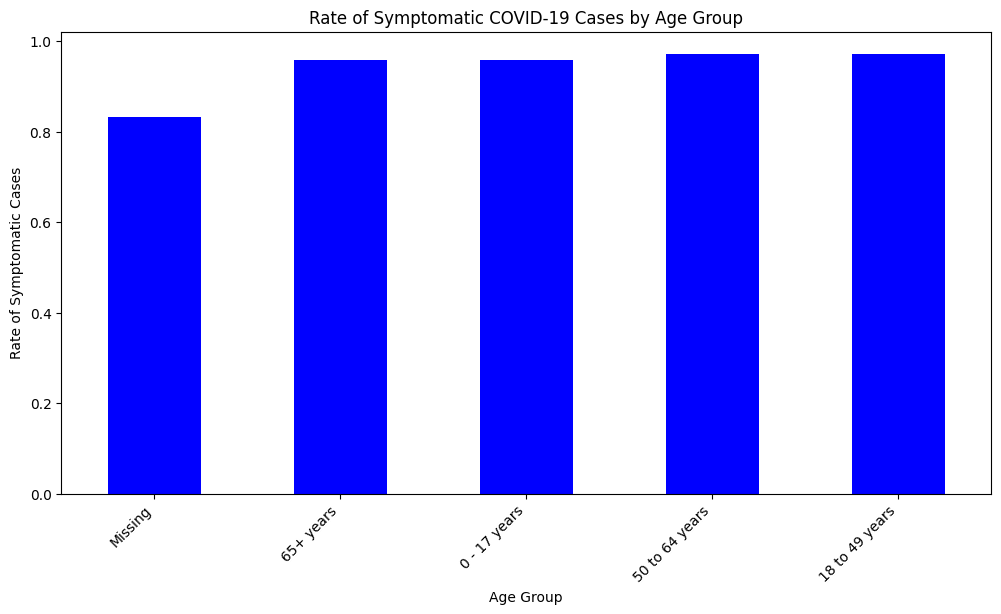

In [ ]:
# Columns to keep
from scipy.stats import chi2_contingency
# Columns to keep
columns_to_keep = ['age_group', 'symptom_status']

# Subset the data
covid_data_subset = df1[columns_to_keep].copy()

# Filter out rows with missing values
covid_data_filtered = covid_data_subset.dropna(subset=['age_group', 'symptom_status'])
covid_data_filtered = covid_data_filtered[covid_data_filtered['symptom_status'].isin(['Symptomatic', 'Asymptomatic'])]

# Create contingency table
symptom_contingency = pd.crosstab(covid_data_filtered['age_group'], covid_data_filtered['symptom_status'])

# Perform chi-square test of independence
chi2_symptom, p_symptom, dof_symptom, ex_symptom = chi2_contingency(symptom_contingency)
print(f'Chi-Square Test for COVID-19 Symptom Manifestation and Age Group:')
print(f'Chi2 Statistic: {chi2_symptom}, p-value: {p_symptom}')

# Calculate the rate of symptomatic cases by age group
symptom_rates = covid_data_filtered.groupby('age_group')['symptom_status'].value_counts(normalize=True).unstack().fillna(0)
symptom_rates_symptomatic = symptom_rates['Symptomatic']

# Plot the data for symptom manifestation
plt.figure(figsize=(12, 6))
symptom_rates_symptomatic.sort_values().plot(kind='bar', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Rate of Symptomatic Cases')
plt.title('Rate of Symptomatic COVID-19 Cases by Age Group')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()